In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-data/credit_data.csv


In [2]:
df=pd.read_csv('../input/credit-data/credit_data.csv')
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [4]:
df.shape

(2000, 5)

In [5]:
df.corr()['default'].sort_values(ascending=False)

default     1.000000
loan        0.377160
income      0.002284
clientid   -0.020145
age        -0.429759
Name: default, dtype: float64

In [6]:
df

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.04487,48.518179,1926.729397,0
1996,1997,69516.12757,23.162104,3503.176156,0
1997,1998,44311.44926,28.017167,5522.786693,1
1998,1999,43756.05660,63.971796,1622.722598,0


In [7]:
import seaborn as sns

In [8]:
df.fillna(df.mean(),inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [10]:
df['age']=df['age'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       2000 non-null   int64  
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 78.2 KB


In [12]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.309500,4444.369695,0.141500
std,577.494589,14326.327119,13.611258,3045.410024,0.348624
min,1.000000,20014.489470,-52.000000,1.377630,0.000000
25%,500.750000,32796.459720,28.750000,1939.708847,0.000000
50%,1000.500000,45789.117310,41.000000,3974.719418,0.000000
75%,1500.250000,57791.281670,52.000000,6432.410625,0.000000
max,2000.000000,69995.685580,63.000000,13766.051240,1.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import Counter

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


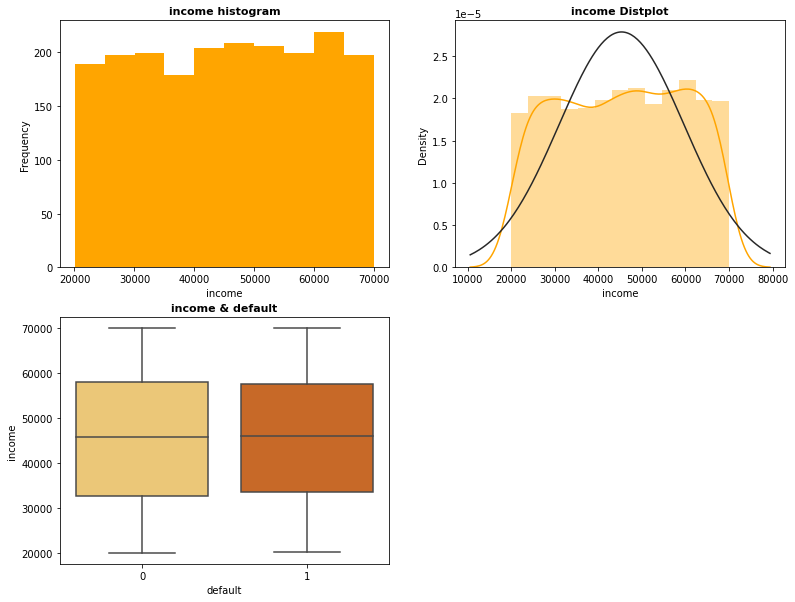

In [14]:
## income

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["income"], color="orange")
plt.xlabel("income")
plt.ylabel("Frequency")
plt.title("income histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["income"], fit=norm, color="orange")
plt.title("income Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.boxplot(df['default'], df["income"], palette='YlOrBr')
plt.title("income & default", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


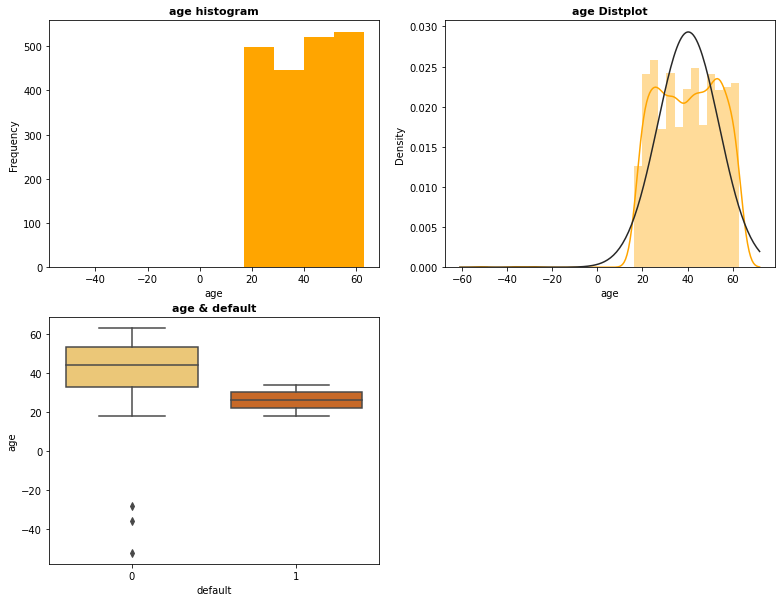

In [15]:
## age

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["age"], color="orange")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.title("age histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["age"], fit=norm, color="orange")
plt.title("age Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.boxplot(df['default'], df["age"], palette='YlOrBr')
plt.title("age & default", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


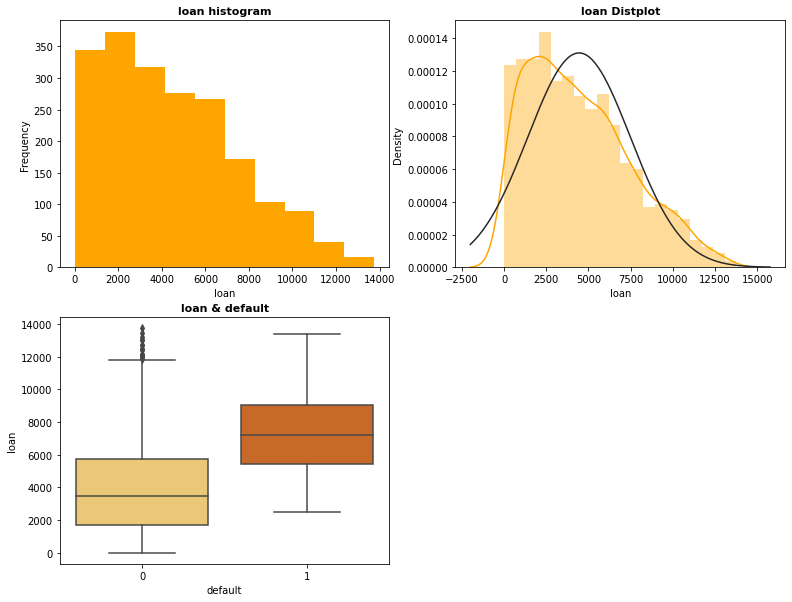

In [16]:
## loan

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["loan"], color="orange")
plt.xlabel("loan")
plt.ylabel("Frequency")
plt.title("loan histogram", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["loan"], fit=norm, color="orange")
plt.title("loan Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.boxplot(df['default'], df["loan"], palette='YlOrBr')
plt.title("loan & default", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

In [17]:
df=df[(df['loan']<11800)&(df['age']>20)]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1837 non-null   int64  
 1   income    1837 non-null   float64
 2   age       1837 non-null   int64  
 3   loan      1837 non-null   float64
 4   default   1837 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 86.1 KB


In [19]:
df=df.drop(['clientid'],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   1837 non-null   float64
 1   age      1837 non-null   int64  
 2   loan     1837 non-null   float64
 3   default  1837 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 71.8 KB


In [21]:
X=df.drop('default', axis=1)
y=df['default']

In [22]:
from sklearn.preprocessing import scale
X_scale=scale(X)
type(X_scale)

numpy.ndarray

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_scale, y, test_size=0.3, random_state=1)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as lrc

In [25]:
param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
grid=GridSearchCV(lrc(random_state=42),param_grid,refit=True,verbose=3)
grid.fit(xtrain,ytrain)
print('best parameters for lr: ',grid.best_params_)
ypredict=grid.predict(xtest)
accuracy_Score = accuracy_score(ytest,ypredict)
print('accuracy score for lr', accuracy_Score*100)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ................. C=0.001, penalty=l2, score=0.879, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Par

[CV] .................. C=10.0, penalty=l2, score=0.977, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................... C=100.0, penalty=l1, score=nan, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................... C=100.0, penalty=l1, score=nan, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................... C=100.0, penalty=l1, score=nan, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................... C=100.0, penalty=l1, score=nan, total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] ................... C=100.0, penalty=l1, score=nan, total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV] ................. C=100.0, penalty=l2, score=0.942, total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV] .

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

In [26]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])